# Liver Disease Analysis

Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Exploration

In [2]:
data=pd.read_csv("data/indian_liver_patient.csv")
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


Data Preprocessing 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Visualization

Text(0, 0.5, 'Frequency')

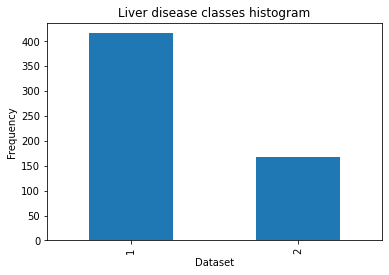

In [5]:
count_classes = pd.value_counts(data['Dataset'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Liver disease classes histogram")
plt.xlabel("Dataset")
plt.ylabel("Frequency")

Data Processing

In [6]:
data['Dataset'] = data['Dataset'].map({2:0,1:1}) 

In [7]:
data['Dataset'].value_counts()

1    416
0    167
Name: Dataset, dtype: int64

In [8]:
data['Gender']=data['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [9]:
data_features=data.drop(['Dataset'],axis=1)
data_num_features=data.drop(['Gender','Dataset'],axis=1)
data_num_features.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40


<AxesSubplot:title={'center':'Pearson Correlation of liver disease Features'}>

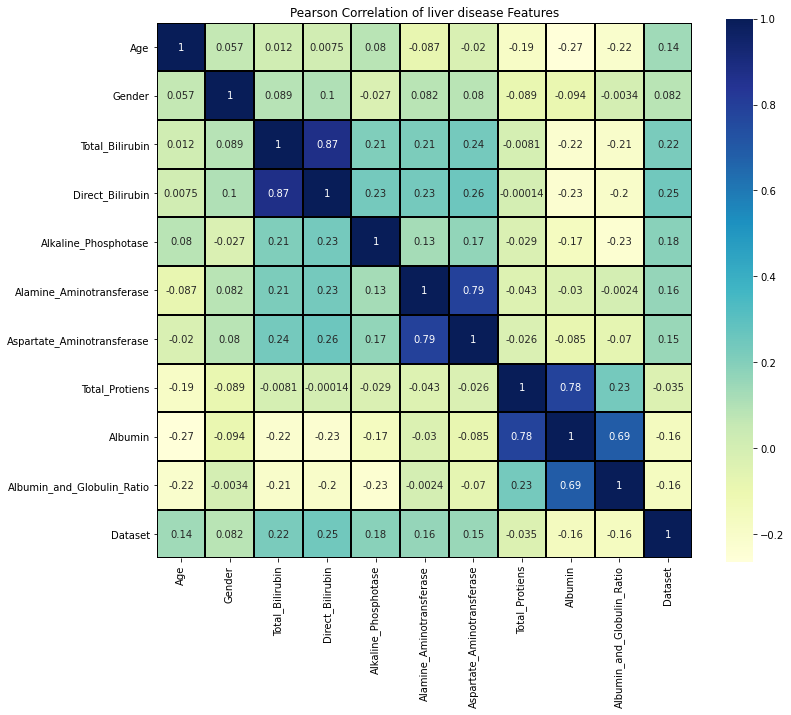

In [10]:
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of liver disease Features')
sns.heatmap(data.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black',annot=True)

In [11]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [12]:
data['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815201

In [13]:
data=data.fillna(0.94)

In [14]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

<AxesSubplot:>

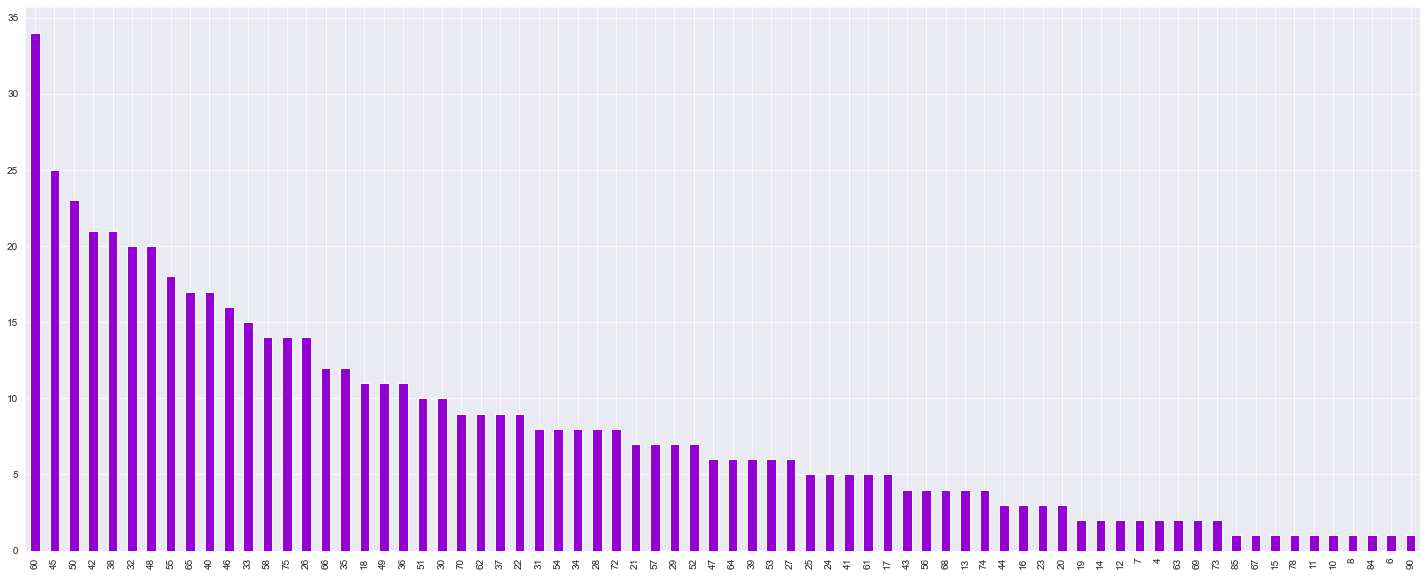

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
data['Age'].value_counts().plot.bar(color='darkviolet')

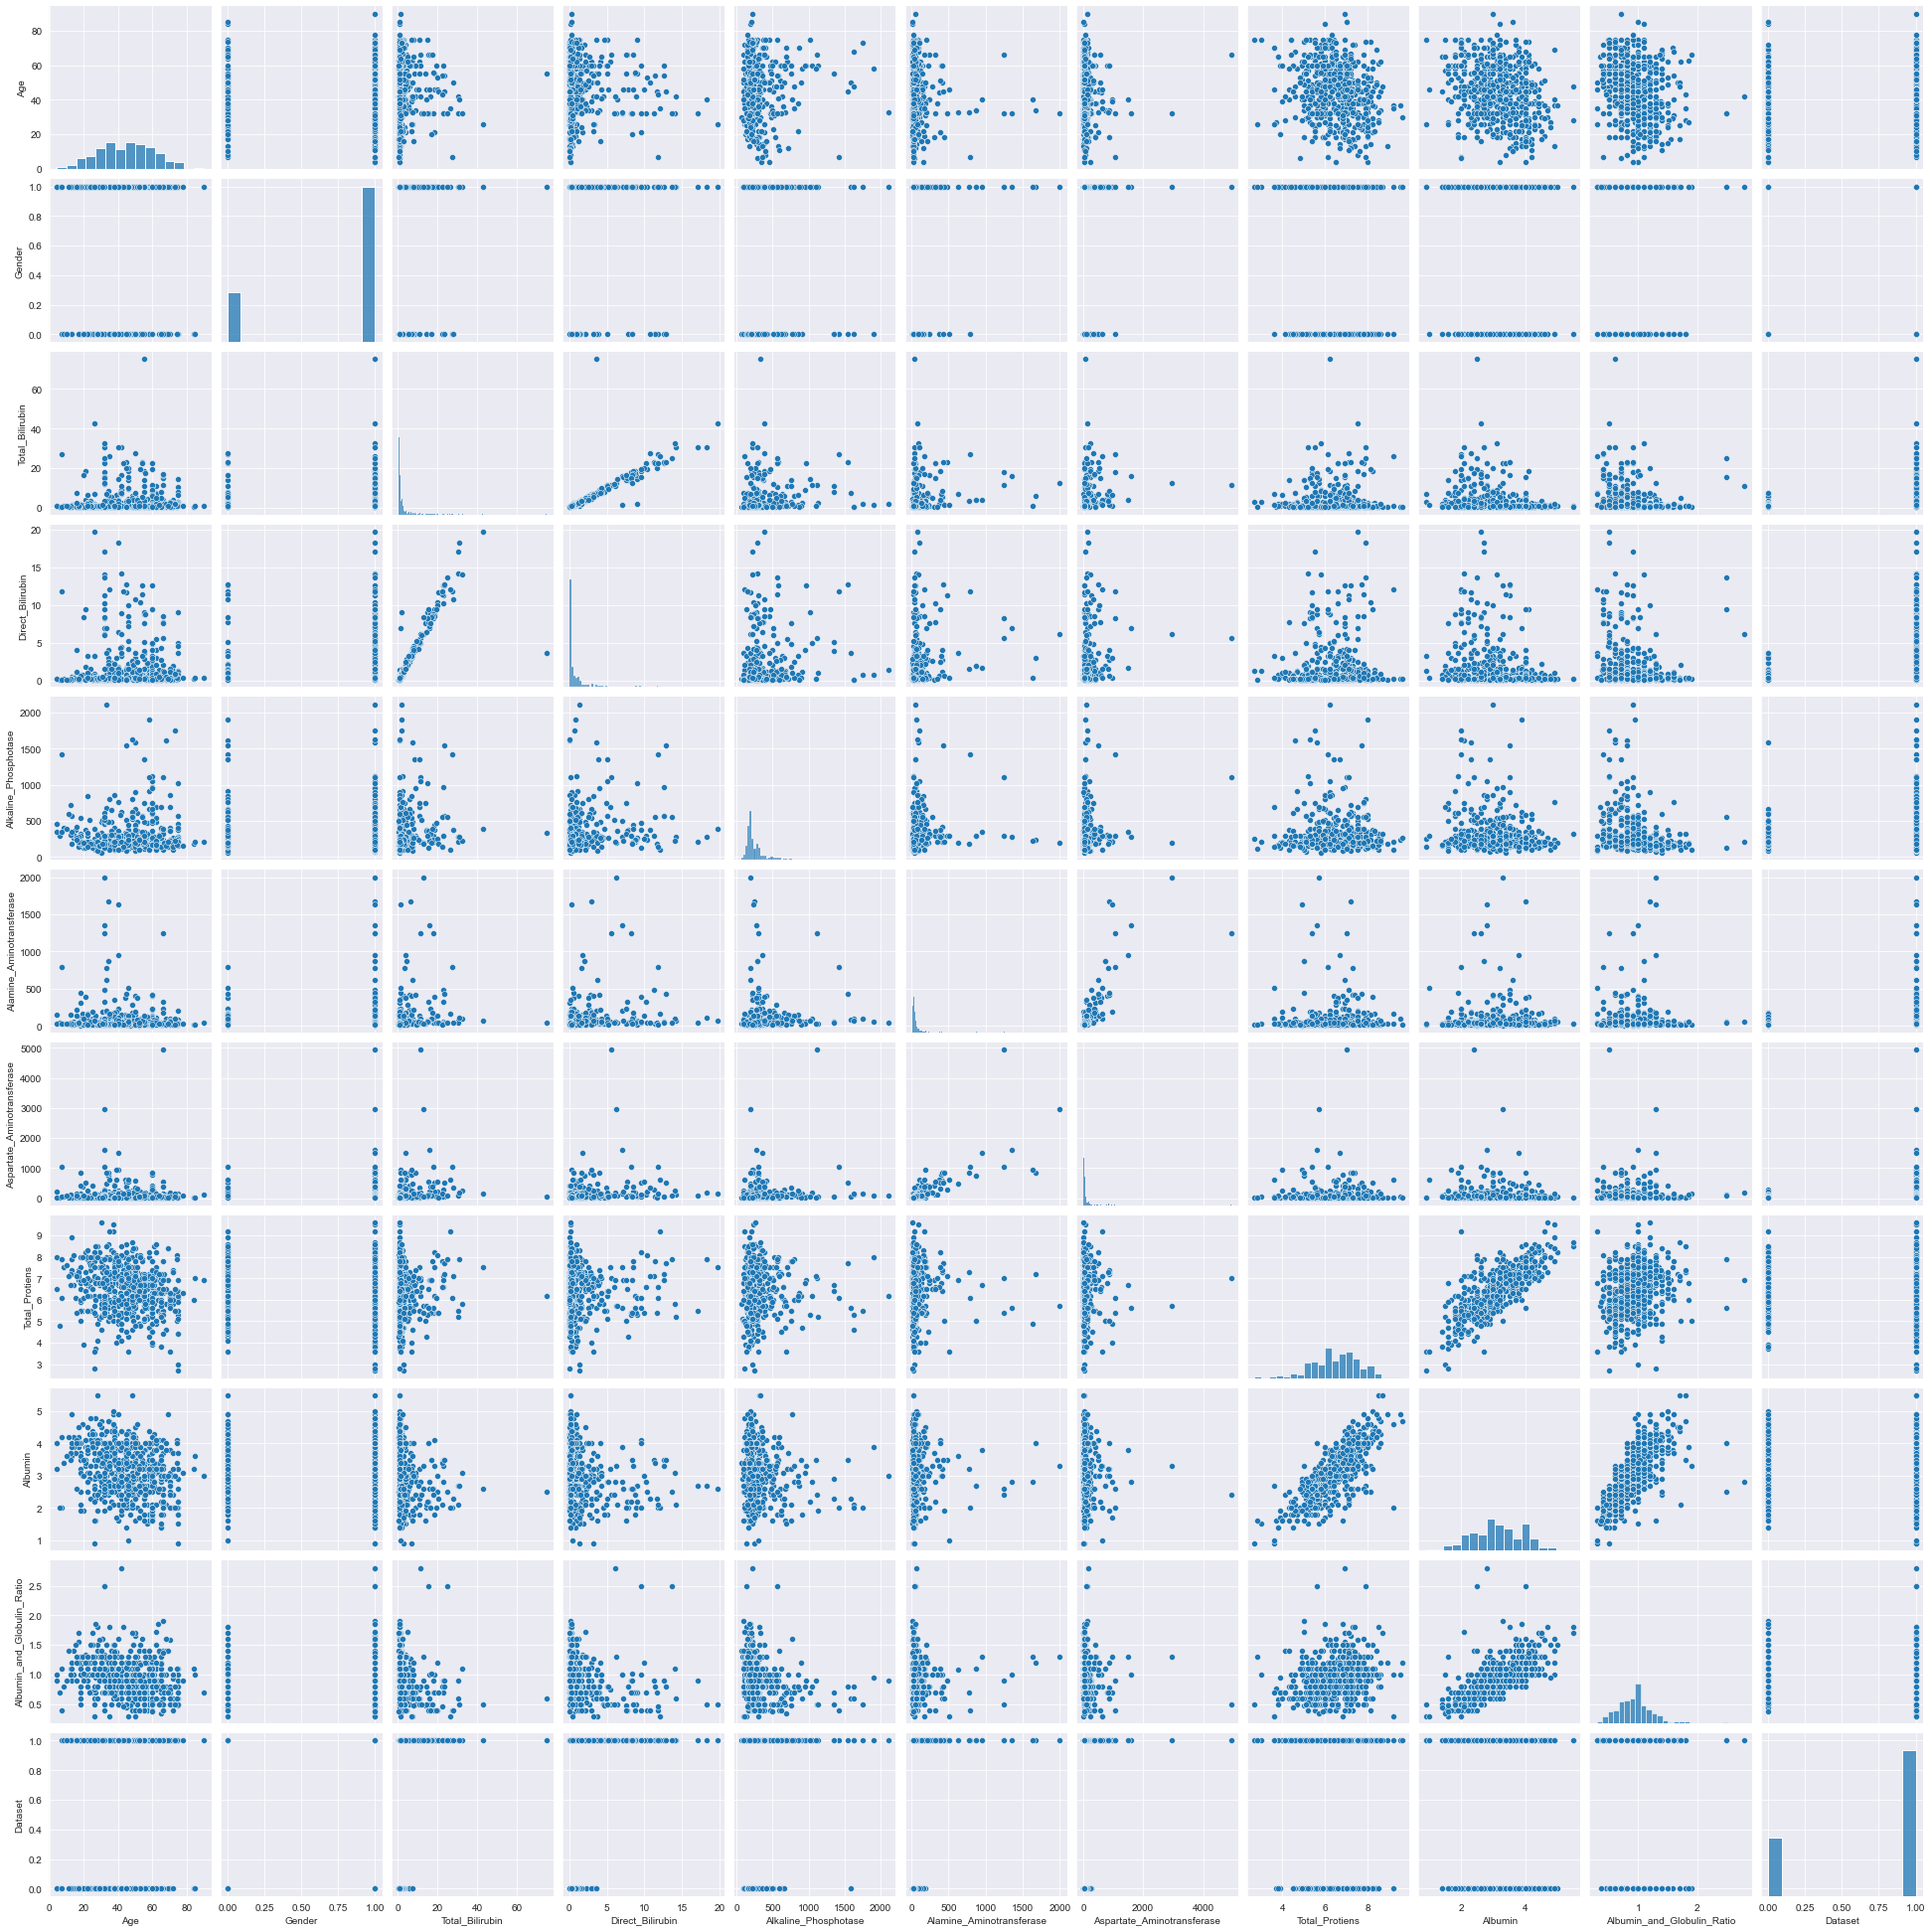

In [16]:
sns.pairplot(data)

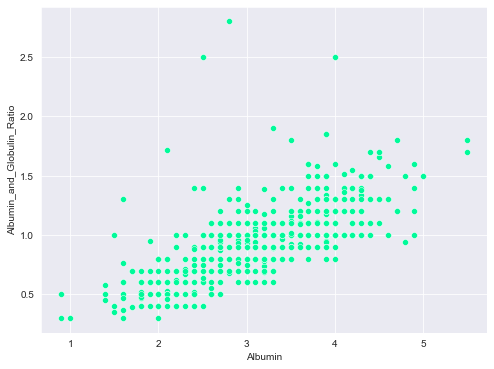

In [17]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio",color='mediumspringgreen',data=data);
plt.show()

<AxesSubplot:xlabel='Gender'>

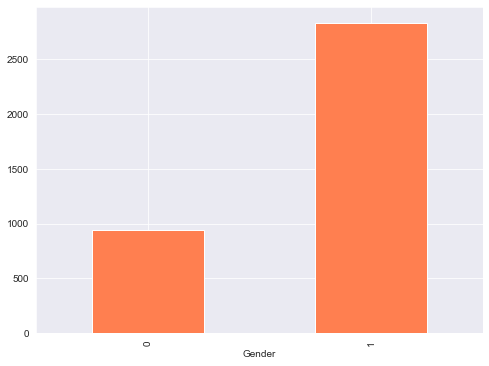

In [18]:
plt.figure(figsize=(8,6))
data.groupby('Gender').sum()["Total_Protiens"].plot.bar(color='coral')

Data Splitting

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [21]:
X=data[['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase']]

y=data['Dataset']

In [22]:
X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase
0,65,0.7,0.1,187,16,18
1,62,10.9,5.5,699,64,100
2,62,7.3,4.1,490,60,68
3,58,1.0,0.4,182,14,20
4,72,3.9,2.0,195,27,59


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.11, random_state = 0)

ML Deployment

Support Vector Machine

In [24]:
from sklearn.svm import SVC
SVM = SVC()

In [25]:
SVM.fit(X_train, y_train)
predictions = SVM.predict(X_test)
predictions

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score
val1 = (accuracy_score(y_test, predictions)*100)

In [27]:
print("*Accuracy score for SVM: ", val1)

*Accuracy score for SVM:  78.46153846153847


Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [29]:
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)
predictions

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1],
      dtype=int64)

In [30]:
val2 = (accuracy_score(y_test, predictions)*100)

In [31]:
print("*Accuracy score for RF: ", val2)

*Accuracy score for RF:  72.3076923076923


DecisionTreeClassifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [33]:
DT.fit(X_train, y_train)
predictions = DT.predict(X_test)
predictions

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0],
      dtype=int64)

In [34]:
val3 = (accuracy_score(y_test, predictions)*100)

In [35]:
print("*Accuracy score for DT: ", val3)

*Accuracy score for DT:  69.23076923076923


KNeighborsClassifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [37]:
KNN.fit(X_train, y_train)
predictions = KNN.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
      dtype=int64)

In [38]:
val4 = (accuracy_score(y_test, predictions)*100)

In [39]:
print("*Accuracy score for KNN: ", val4)

*Accuracy score for KNN:  72.3076923076923


LogisticRegression

In [40]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [41]:
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)
predictions

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
      dtype=int64)

In [42]:
val5 = (accuracy_score(y_test, predictions)*100)

In [43]:
print("*Accuracy score for LR: ", val5)

*Accuracy score for LR:  80.0


Accuracy Comparsion

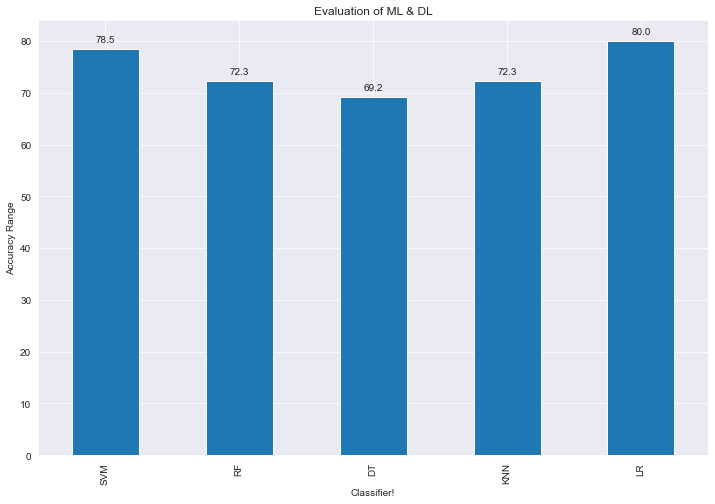

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


frequencies = [val1,val2,val3,val4,val5]
freq_series = pd.Series(frequencies)

x_labels = ['SVM', 'RF','DT','KNN','LR']


plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML & DL')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.1f}".format(y_value)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)      
add_value_labels(ax)
plt.show()


In [45]:
import joblib
filename = 'model_liver.sav'
joblib.dump(LR, filename)

['model_liver.sav']